<a href="https://colab.research.google.com/github/RoyElkabetz/Q_Learning_course/blob/main/naive_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## uncomment only if running from google.colab
# clone the git reposetory
!git clone https://github.com/RoyElkabetz/Q_Learning_course.git

# add path to .py files for import
import sys
sys.path.insert(1, "/content/Q_Learning_course")

Cloning into 'Q_Learning_course'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 68 (delta 26), reused 53 (delta 13), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [2]:
!pip install gym

In [3]:
import gym
import torch as T
import numpy as np
import matplotlib.pyplot as plt
from q_learning_agents import DQNAgent
from utils import plot_learning_curve
from tqdm.auto import tqdm

In [4]:
env = gym.make('CartPole-v1')
n_games = 10000
win_prc = []
scores = []
eps_history = []


agent = DQNAgent(input_dims=env.observation_space.shape, n_actions=env.action_space.n)

for i in tqdm(range(n_games)):
	done = False
	obs = env.reset()
	score = 0

	while not done:
		action = agent.choose_action(obs)
		obs_, reward, done, info = env.step(action)
		score += reward
		agent.learn(obs, action, reward, obs_)
		obs = obs_
	scores.append(score)
	eps_history.append(agent.epsilon)
	if i % 100 == 0:
		avg_score = np.mean(scores[-100:])
		print('| game: {:10d}| score: {:2.2f} | avg_score: {:2.2f} | epsilon: {:2.8f} |'.format(i, score, avg_score, agent.epsilon))
env.close()

| game:          0| score: 8.00 | avg_score: 8.00 | epsilon: 0.01000000 |
| game:        100| score: 19.00 | avg_score: 14.89 | epsilon: 0.01000000 |
| game:        200| score: 17.00 | avg_score: 21.80 | epsilon: 0.01000000 |
| game:        300| score: 20.00 | avg_score: 19.33 | epsilon: 0.01000000 |
| game:        400| score: 28.00 | avg_score: 27.65 | epsilon: 0.01000000 |
| game:        500| score: 74.00 | avg_score: 45.80 | epsilon: 0.01000000 |
| game:        600| score: 48.00 | avg_score: 43.64 | epsilon: 0.01000000 |
| game:        700| score: 37.00 | avg_score: 42.27 | epsilon: 0.01000000 |
| game:        800| score: 15.00 | avg_score: 25.70 | epsilon: 0.01000000 |
| game:        900| score: 20.00 | avg_score: 15.60 | epsilon: 0.01000000 |
| game:       1000| score: 39.00 | avg_score: 54.66 | epsilon: 0.01000000 |
| game:       1100| score: 28.00 | avg_score: 32.84 | epsilon: 0.01000000 |
| game:       1200| score: 33.00 | avg_score: 27.29 | epsilon: 0.01000000 |
| game:       

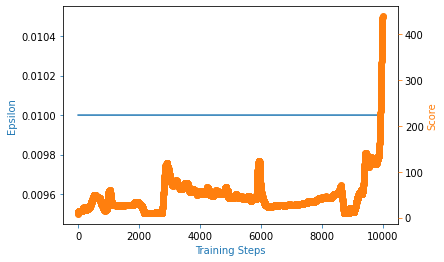

In [5]:
filename = 'cartpole_naive_dqn.png'
x = [i + 1 for i in range(n_games)]
plot_learning_curve(x, scores, eps_history, filename)